Pranav Kumar,
prn 1032200232,
FY BTECH

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

iris = load_iris()
data = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                    columns=iris['feature_names'] + ['target'])

In [4]:
print("Dataset shape:", data.shape)
print("\nDataset columns:", data.columns)
print("\nDataset description:\n", data.describe())

Dataset shape: (150, 5)

Dataset columns: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Dataset description:
        sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.0

In [5]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


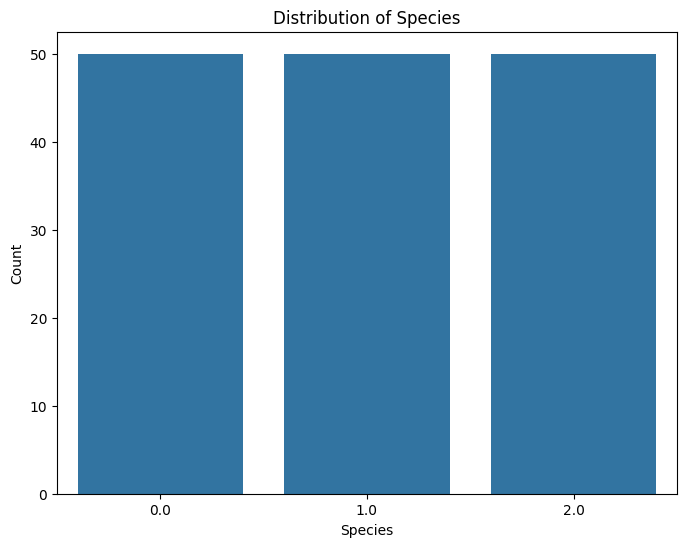

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=data)
plt.xlabel("Species")
plt.ylabel("Count")
plt.title("Distribution of Species")
plt.show()

<Figure size 1200x800 with 0 Axes>

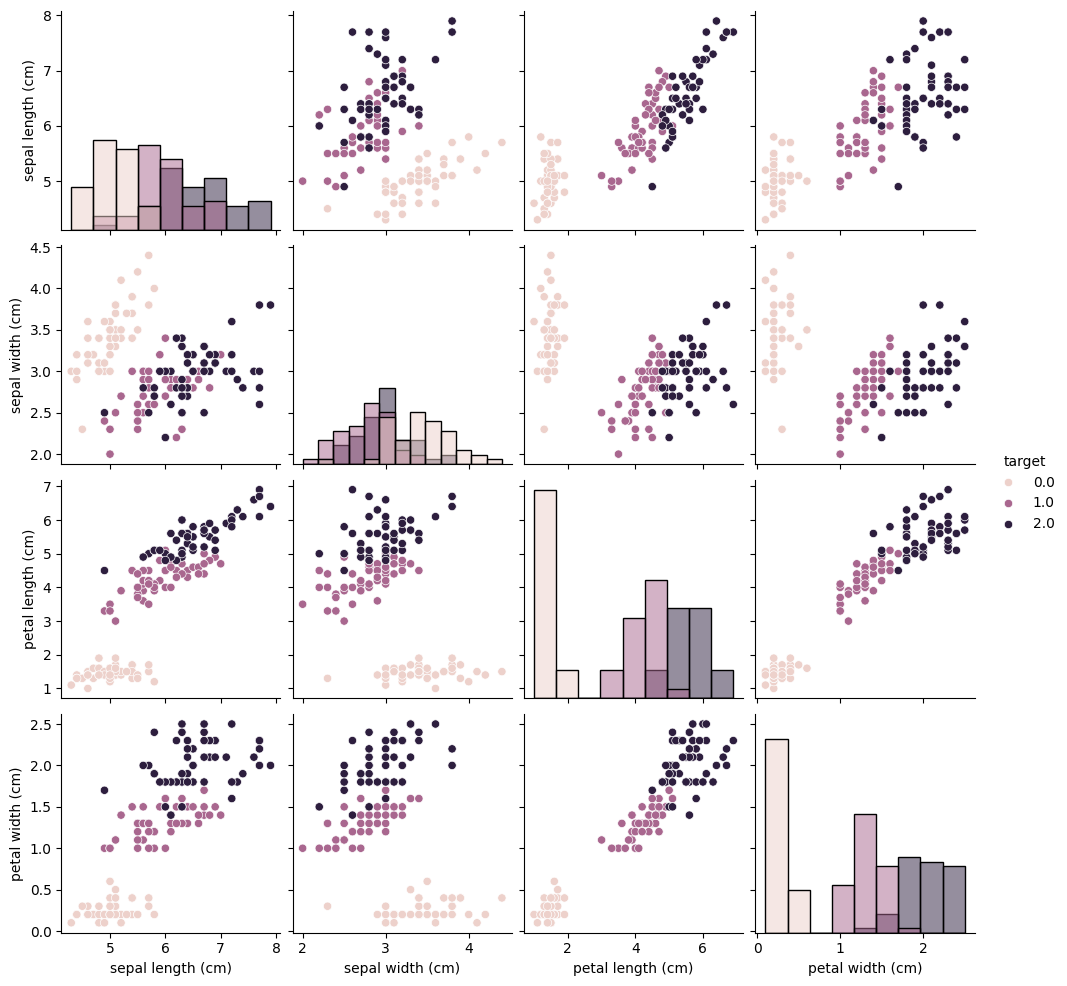

In [7]:
plt.figure(figsize=(12, 8))
sns.pairplot(data, hue='target', diag_kind='hist')
plt.show()

In [8]:
X = data.drop('target', axis=1)
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion)
print("\nClassification Report:\n", report)

Accuracy: 0.9666666666666667

Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.89      0.94         9
         2.0       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



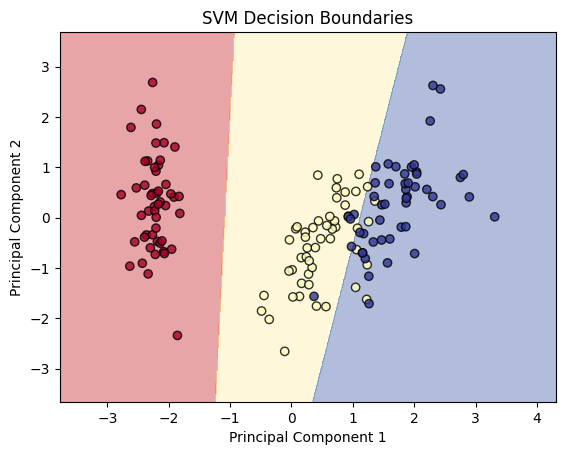

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.8, cmap=plt.cm.RdYlBu, edgecolors='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundaries')
plt.show()

Accuracy: 0.9
Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.88      0.78      0.82         9
         2.0       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



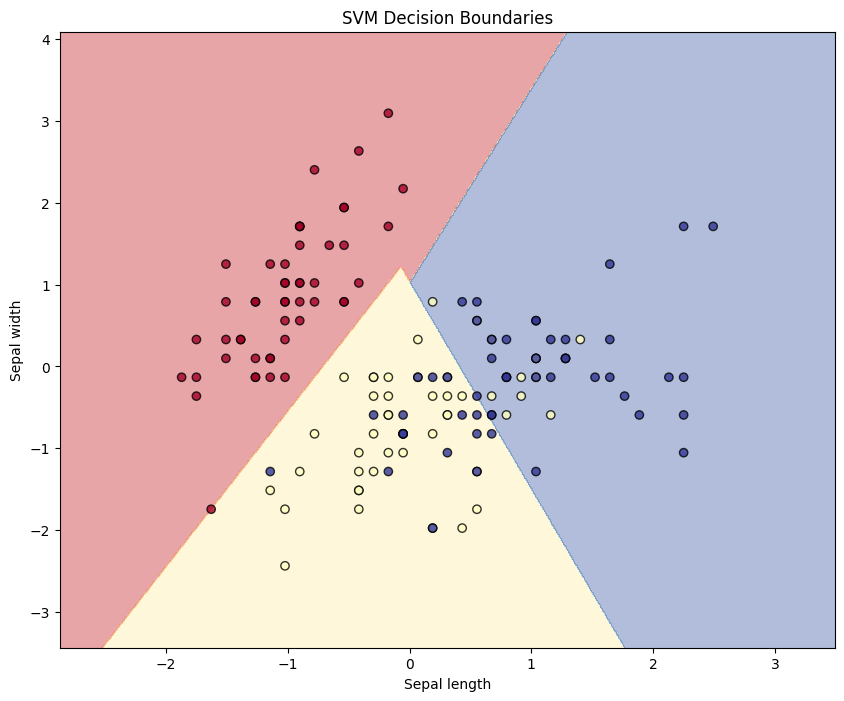

In [11]:
X = data[['sepal length (cm)', 'sepal width (cm)']]
y = data['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

plt.figure(figsize=(10, 8))
X_0, X_1 = X_scaled[:, 0], X_scaled[:, 1]
xx, yy = np.meshgrid(np.arange(start=X_0.min() - 1, stop=X_0.max() + 1, step=0.01),
                     np.arange(start=X_1.min() - 1, stop=X_1.max() + 1, step=0.01))
Z = svm.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
plt.scatter(X_0, X_1, c=y, alpha=0.8, cmap=plt.cm.RdYlBu, edgecolors='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries')
plt.show()